In [50]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import *
class RectangleG ( object ) :
    def __init__ ( self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f =f
        self.n=n
        
    def integrate(self,f):
        x=self.x
        y=f(x)
        h=float(x[1]-x[0])
        s=sum(y[0:-1])
        return h*s
    def Graph (self,f,resolution=1001) :
        xl=self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a,self.b,resolution)
        for i in range (self.n):
            x_rect= [ xl [ i ] , xl [ i ] , xl [ i + 1 ] , xl [ i + 1 ] , xl [ i ] ] 
            y_rect= [ 0 , yl [ i ] , yl [ i ] , 0 , 0 ]
            plt.plot(x_rect,y_rect,"r")
        yflist_fine =f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("methode_des_rectangle_gauche")
        plt.text(0.5*(self.a+self.b),f(self.b), 'I_{} ={:0.4f} '.format( self.n,self.integrate(f)) , fontsize=15)
        #print(' itegrale approché par méthode des rectangle :I_{} ={:0.4f} '.format( self.n,self.integrate(f)))

In [51]:
#methode trapezoide
import matplotlib.pyplot as plt
import numpy as np
from math import *
from numpy import *
class Trapezoidal( object ) :
    def __init__ ( self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f =f
        self.n=n
        
    def integrate(self,f):
        x=self.x
        y=f(x)
        h=float(x[1]-x[0])
        s=y[0]+y[-1]+2.0*sum(y[1:-1])
        return h*s/2.0
    def Graph (self,f,resolution=1001) :
        xl=self.x
        yl=f(xl)
        xlist_fine=np.linspace(self.a,self.b,resolution)
        for i in range (self.n):
            x_rect= [ xl [ i ] , xl [ i ] , xl [ i + 1 ] , xl [ i + 1 ] , xl [ i ] ] 
            y_rect= [ 0 , yl [ i ] , yl [ i+1 ] , 0 , 0 ]
            plt.plot(x_rect,y_rect,"m")
        yflist_fine =f(xlist_fine)
        plt.plot(xlist_fine,yflist_fine)
        plt.plot(xl,yl,"cs")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("methode_des_trapezes")
        plt.text(0.5*(self.a+self.b),f(self.b), 'I_{} ={:0.4f} '.format( self.n,self.integrate(f)) , fontsize=15)
        

In [58]:
from ipywidgets import interact,Layout
import ipywidgets as widgets
import numpy as  np
import matplotlib.pyplot as plt


# create some control elements
sel = widgets.Dropdown(
      options=[('Methode des rectangles gauches',1) ,('methode des trapézes' ,2 )]
    
     # value =2,
    #description='Méthode',
)


#int_slider = widgets.IntSlider(value=1, min=0, max=10, step=1, description='freq')
text_func= widgets.Text(value='cos(x)', description='fonction ', continuous_update=False)
#color_picker = widgets.ColorPicker(value=initial_color, description='pick a color')
text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)
text_a = widgets.Text(value='1', description='a', continuous_update=False)
text_b = widgets.Text(value='1', description='b', continuous_update=False)
text_n = widgets.Text(value='3', description='n', continuous_update=False)
text_int= widgets.Text(value='', description='I_n', continuous_update=False)
button=widgets.Button (description="calculer")
 
# callback functions

def sim(b):
    dic={1:RectangleG ,2:Trapezoidal}
    s=sel.value
    plt.cla()
    func=lambda x:eval (text_func.value)
    R=dic[s](float(text_a.value),float(text_b.value),int(text_n.value),func)
    R.Graph(func)
    text_int.value=str(R.integrate(func))
   # text_int.description'I_n'   

def update_a(change):
    """redraw line (update plot)"""
    change.new
    
def update_b(change):
    """redraw line (update plot)"""
    change.new
def update_n(change):
    """redraw line (update plot)"""
    change.new
def update_f(change):
    """redraw line (update plot)"""
    change.new    
     

 

button.on_click(sim)
# connect callbacks and traits

text_func.observe(update_f, 'value')
text_a.observe(update_a, 'value')
text_b.observe(update_b, 'value')
text_n.observe(update_n, 'value')

'''output=widgets.Output()

controls = widgets.VBox([sel,text_a,text_b,text_n,text_func,button])
widgets.HBox([controls, output])
'''

'output=widgets.Output()\n\ncontrols = widgets.VBox([sel,text_a,text_b,text_n,text_func,button])\nwidgets.HBox([controls, output])\n'

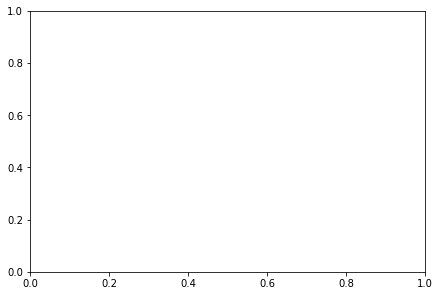

In [59]:
output=widgets.Output()
with output :
    fig, ax=plt.subplots(constrained_layout=True,figsize=(6,4))
    fig.canvas.toolbar_position='bottom'    

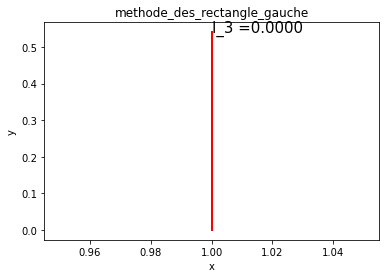

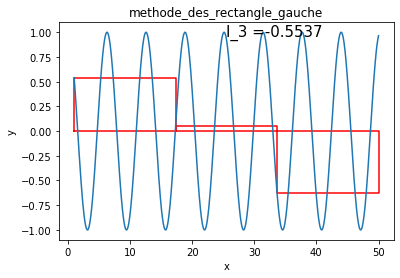

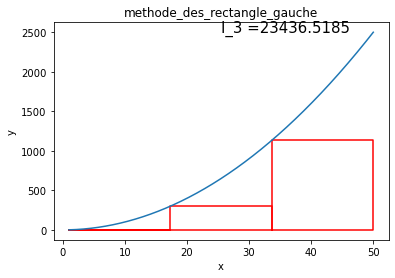

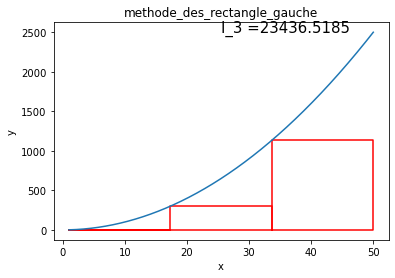

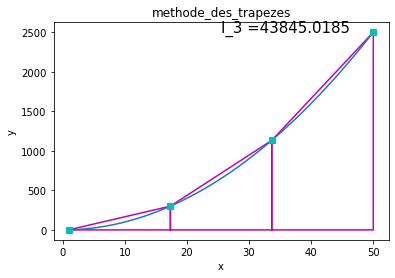

In [60]:

def make_boxes():
    vbox1 = widgets.VBox([widgets.Label('Left'),sel,text_a,text_b,text_n,text_func,button])
    vbox2 = widgets.VBox([widgets.Label('Right'),output])
    return vbox1, vbox2
 
vbox1, vbox2 = make_boxes()
 
widgets.HBox([vbox1, vbox2])


box_layout=widgets.Layout(
                  border='solid 2px gray',
                  margin= '0px 10px 0px',
                paddings='5px 5px 5px 5px')

vbox1,vbox2=make_boxes()
vbox1.Layout =box_layout
vbox2.Layout =box_layout
widgets.HBox([vbox1,vbox2])


